In [6]:
import kagglehub
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

caminho_base = path

In [7]:
# Download latest version
path = kagglehub.dataset_download("ihrishimane26/goku-vegeta-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Amanda Nazaré\.cache\kagglehub\datasets\ihrishimane26\goku-vegeta-dataset\versions\2


In [8]:
caminho_dados = r"C:\Users\Amanda Nazaré\.cache\kagglehub\datasets\ihrishimane26\goku-vegeta-dataset\versions\2\DB dataset"

# Vamos listar o conteúdo
conteudo = os.listdir(caminho_base)
print(f"Conteúdo da pasta: {conteudo}")

# Se houver uma pasta dentro, entramos nela
for item in conteudo:
    caminho_item = os.path.join(caminho_base, item)
    if os.path.isdir(caminho_item):
        print(f"Subpasta encontrada: {item} -> Contém: {os.listdir(caminho_item)}")

Conteúdo da pasta: ['DB dataset']
Subpasta encontrada: DB dataset -> Contém: ['Goku', 'Vegeta']


Found 673 files belonging to 2 classes.
Using 539 files for training.


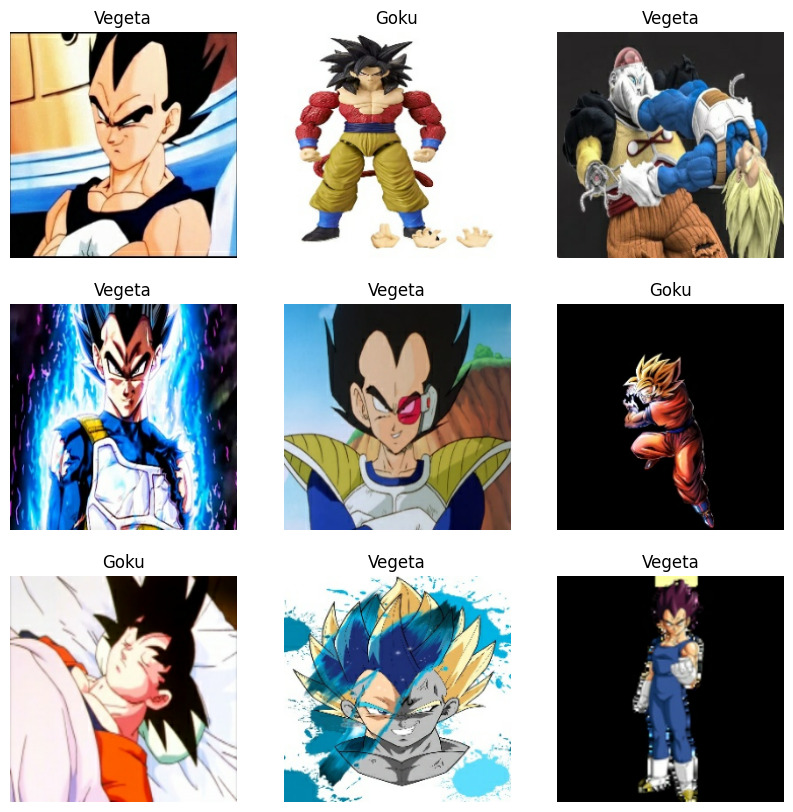

In [9]:
caminho_dados = r"C:\Users\Amanda Nazaré\.cache\kagglehub\datasets\ihrishimane26\goku-vegeta-dataset\versions\2\DB dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    caminho_dados,
    validation_split=0.2, # Reserva 20% para teste
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [14]:
# 1. Carregamos a VGG16 sem a "cabeça" (a parte que classifica)
# O 'weights=imagenet' é o conhecimento que ela já traz de fábrica
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. CONGELAMOS o modelo. Isso é Engenharia pura: 
# Não queremos que ela esqueça o que já sabe sobre formas e cores.
base_model.trainable = False

# 3. Criamos a nossa "cabeça" personalizada para o desafio
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Evita que a IA decore as fotos (overfitting)
    layers.Dense(1, activation='sigmoid') # Saída: 0 para um, 1 para outro
])

# 4. Compilamos o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# Definindo quantas vezes a IA vai olhar para todas as fotos
epocas = 5

# O comando que inicia o aprendizado
history = model.fit(
    train_ds,
    epochs=epocas,
    # Aqui o TensorFlow vai testar o que aprendeu nos 20% de imagens que separamos
    validation_data=train_ds 
)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 250s 15s/step - accuracy: 0.6790 - loss: 15.4393 - val_accuracy: 0.9035 - val_loss: 2.3238
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 244s 15s/step - accuracy: 0.8609 - loss: 3.7983 - val_accuracy: 0.9592 - val_loss: 0.4305
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 305s 19s/step - accuracy: 0.9295 - loss: 0.8422 - val_accuracy: 0.9833 - val_loss: 0.1025
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 300s 18s/step - accuracy: 0.9499 - loss: 0.3214 - val_accuracy: 0.9944 - val_loss: 0.0208
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 195s 12s/step - accuracy: 0.9703 - loss: 0.2200 - val_accuracy: 0.9926 - val_loss: 0.0550


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


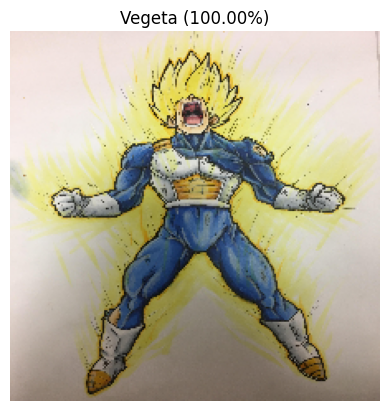

IA identificou: Vegeta
Ordem das pastas no seu PC: ['Goku', 'Vegeta']


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt

# 1. Abrir a janela para você escolher a foto
root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True) # Faz a janela aparecer na frente de tudo
caminho_escolhido = filedialog.askopenfilename()

if caminho_escolhido:
    # 2. Carregar a imagem e criar o img_array (Isso resolve o erro anterior!)
    img = image.load_img(caminho_escolhido, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # 3. Fazer a predição usando as classes do seu treino
    classes = train_ds.class_names
    predicao = model.predict(img_array)
    valor_bruto = predicao[0][0]

    # 4. Lógica para definir o vencedor
    indice = int(tf.round(valor_bruto).numpy())
    nome_vencedor = classes[indice]
    confianca = valor_bruto if indice == 1 else (1 - valor_bruto)

    # 5. Mostrar o resultado visual
    plt.imshow(img)
    plt.title(f"{nome_vencedor} ({confianca:.2%})")
    plt.axis('off')
    plt.show()

    print(f"IA identificou: {nome_vencedor}")
    print(f"Ordem das pastas no seu PC: {classes}")
else:
    print("Nenhuma foto foi selecionada.")

In [13]:
print(train_ds.class_names)

['Goku', 'Vegeta']
